## EDA- 3 year Aggregate data

*Source: TBA*

*Author: R Young*

### Focus: Data organization


In [2]:
import pandas as pd
import numpy as np
#import geopandas as geopd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('../main_data/sac_3yr_aggregate/3 year 21-22-23 SAC Agg.xlsx')
df.head()

,State,Year,Organizations,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,...,Intakes - Other Intakes Total-Canine,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine
0,AK,2021,5,886,1620,85,37,133,2217,365,...,144,763,948,0,3,6,7,0,80,82
1,AK,2022,5,1128,1878,51,42,146,2158,310,...,189,1106,1006,0,1,3,4,1,112,216
2,AK,2023,5,911,1814,45,42,122,2148,223,...,210,993,880,0,8,4,12,1,149,257
3,AL,2021,17,1548,3414,707,0,644,3816,78,...,1953,6577,2101,1,3592,90,180,7,7,2994
4,AL,2022,17,1419,3400,816,3,503,4307,65,...,2277,6681,2012,0,3190,808,193,14,0,3262


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   State                                                   153 non-null    object
 1   Year                                                    153 non-null    int64 
 2   Organizations                                           153 non-null    int64 
 3   Intake - Relinquished By Owner Total-Feline             153 non-null    int64 
 4   Intake - Stray At Large Total-Feline                    153 non-null    int64 
 5   Intake - Transferred In Total-Feline                    153 non-null    int64 
 6   Intake - Owner Intended Euthanasia Total-Feline         153 non-null    int64 
 7   Intakes - Other Intakes Total-Feline                    153 non-null    int64 
 8   Live Outcome - Adoption Total-Feline              

In [23]:
df.State.unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
       'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

Clean data:
- Make new dataframe that exludes any 'Feline' data
- remove all captilized letters and replace whitespace with '_'

In [5]:
dog_df = df.drop([i for i in df.columns if 'Feline' in i], axis=1)

list01 = [i for i in dog_df.columns.unique() if 'Feline' not in i]
list02 = [i.replace(' - ','_').replace('-','_').replace(' ','_').lower() for i in list01]
edit_col = {list01[i]:list02[i] for i in range(len(list01))}
del list01, list02

dog_df.rename(columns=edit_col, inplace=True)


In [6]:
dog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   state                                                 153 non-null    object
 1   year                                                  153 non-null    int64 
 2   organizations                                         153 non-null    int64 
 3   intake_relinquished_by_owner_total_canine             153 non-null    int64 
 4   intake_stray_at_large_total_canine                    153 non-null    int64 
 5   intake_transferred_in_total_canine                    153 non-null    int64 
 6   intake_owner_intended_euthanasia_total_canine         153 non-null    int64 
 7   intakes_other_intakes_total_canine                    153 non-null    int64 
 8   live_outcome_adoption_total_canine                    153 non-null    

In [7]:
intake_cols  = [i for i in dog_df.columns if 'intake' in i]
outcome_cols = [i for i in dog_df.columns if 'outcome' in i]

dog_df['intake_total']  = dog_df[intake_cols].sum(axis=1)
dog_df['outcome_total'] = dog_df[outcome_cols].sum(axis=1)

dog_df['diff']  = dog_df.outcome_total - dog_df.intake_total
dog_df['ratio'] = dog_df.intake_total / dog_df.outcome_total

#del intake_cols, outcome_cols


In [8]:
dog_df[['state','year','intake_total','outcome_total','diff','ratio']]


,state,year,intake_total,outcome_total,diff,ratio
0,AK,2021,1914,1889,-25,1.013235
1,AK,2022,2438,2449,11,0.995508
2,AK,2023,2278,2304,26,0.988715
3,AL,2021,15304,15549,245,0.984243
4,AL,2022,15959,16160,201,0.987562
...,...,...,...,...,...,...
148,WV,2022,5128,5149,21,0.995922
149,WV,2023,4920,5072,152,0.970032
150,WY,2021,4017,4449,432,0.902900
151,WY,2022,3904,4162,258,0.938011


### Focus: General Trends & Insights

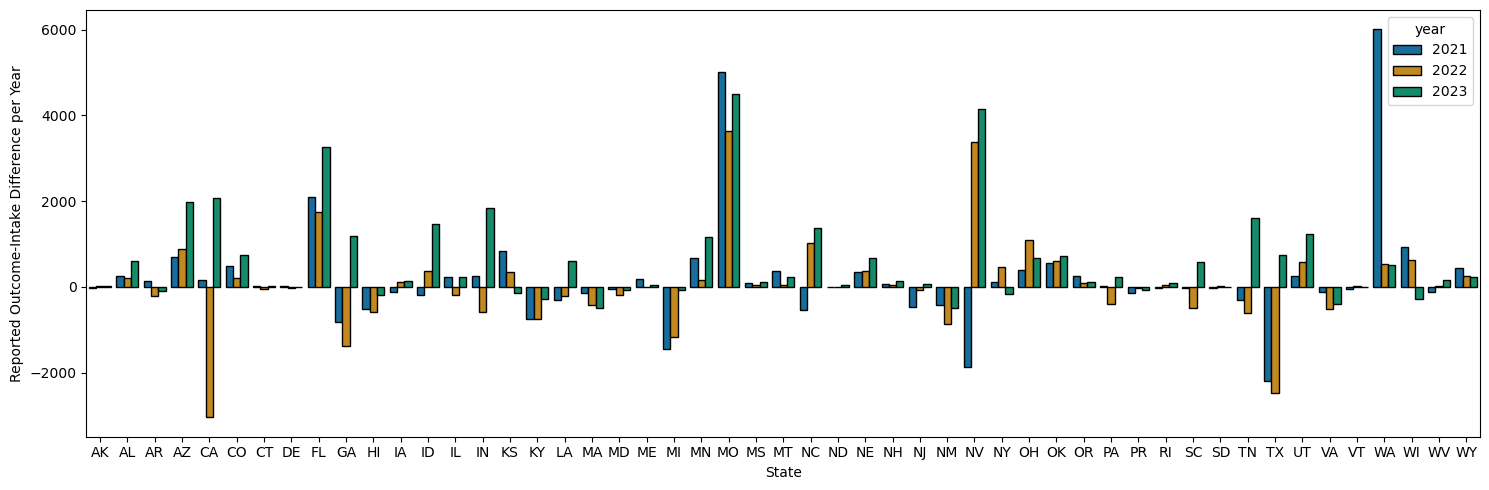

<Figure size 640x480 with 0 Axes>

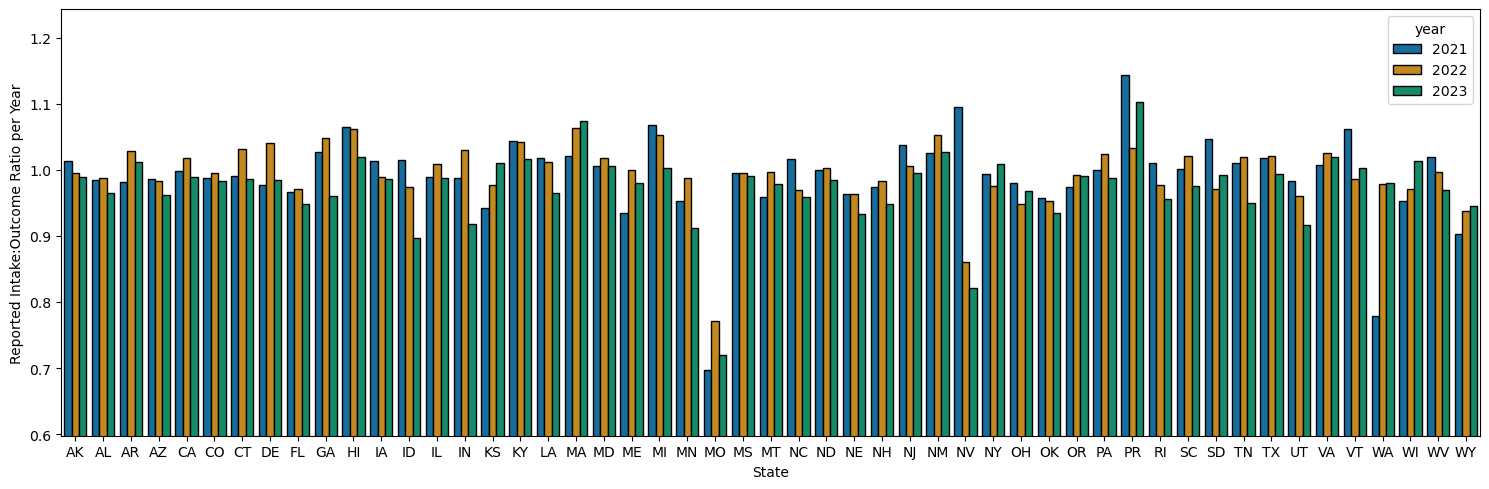

<Figure size 640x480 with 0 Axes>

In [55]:
fig = plt.figure(figsize=(15,5))

sns.barplot(data=dog_df,
            x='state',
            y='diff',
            hue='year',
            palette='colorblind', edgecolor='black')
plt.ylabel("Reported Outcome-Intake Difference per Year")
plt.xlabel("State")
plt.tight_layout()
plt.savefig("eda_3yr-sas-agg_diff01.png", dpi=300)
plt.show()
plt.clf()


fig = plt.figure(figsize=(15,5))
sns.barplot(data=dog_df,
            x='state',
            y='ratio',
            hue='year',
            palette='colorblind', edgecolor='black')
plt.ylim(dog_df.ratio.min()-0.10, dog_df.ratio.max()+0.10)
plt.ylabel("Reported Intake:Outcome Ratio per Year")
plt.xlabel("State")

plt.tight_layout()
plt.savefig("eda_3yr-sas-agg_ratio01.png", dpi=300)
plt.show()
plt.clf()


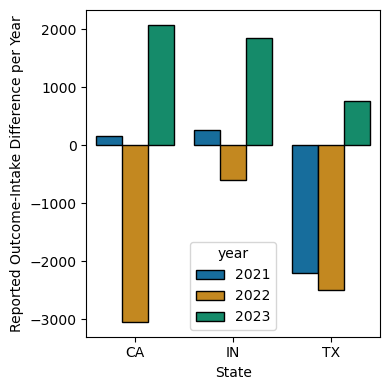

<Figure size 640x480 with 0 Axes>

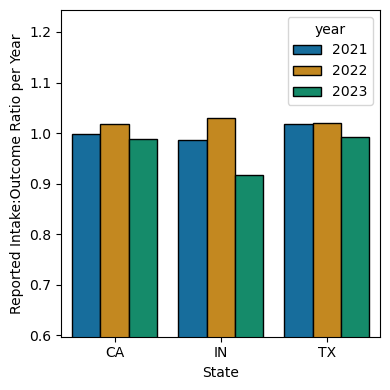

<Figure size 640x480 with 0 Axes>

In [56]:
fig = plt.figure(figsize=(4,4))

sns.barplot(data=dog_df[dog_df.state.isin(['CA','IN','TX'])],
            x='state',
            y='diff',
            hue='year',
            palette='colorblind', edgecolor='black')
plt.ylabel("Reported Outcome-Intake Difference per Year")
plt.xlabel("State")
plt.tight_layout()
plt.savefig("eda_3yr-sas-agg_tristate_diff01.png", dpi=300)
plt.show()
plt.clf()


fig = plt.figure(figsize=(4,4))
sns.barplot(data=dog_df[dog_df.state.isin(['CA','IN','TX'])],
            x='state',
            y='ratio',
            hue='year',
            palette='colorblind', edgecolor='black')
plt.ylim(dog_df.ratio.min()-0.10, dog_df.ratio.max()+0.10)
plt.ylabel("Reported Intake:Outcome Ratio per Year")
plt.xlabel("State")
plt.tight_layout()
plt.savefig("eda_3yr-sas-agg_tristate_ratio01.png", dpi=300)
plt.show()
plt.clf()

### Focus: Intake Categories

In [11]:
intake_df = dog_df[['state','year']+intake_cols].copy()
intake_df.rename(columns={'intake_relinquished_by_owner_total_canine':'relinquished',
                          'intake_stray_at_large_total_canine':'stray',
                          'intake_transferred_in_total_canine':'transfer',
                          'intake_owner_intended_euthanasia_total_canine':'intended_euthanasia',
                          'intakes_other_intakes_total_canine':'other'}, inplace=True)

intake_df['intake_sum'] = intake_df['relinquished']+intake_df['stray']+intake_df['transfer']+intake_df['intended_euthanasia']+intake_df['other']

for par in ['relinquished','stray','transfer','intended_euthanasia','other']:
    intake_df[par+"_makeup"] = intake_df[par] / intake_df.intake_sum

intake_df.head()

,state,year,relinquished,stray,transfer,intended_euthanasia,other,intake_sum,relinquished_makeup,stray_makeup,transfer_makeup,intended_euthanasia_makeup,other_makeup
0,AK,2021,565,1130,0,75,144,1914,0.295193,0.590387,0.000000,0.039185,0.075235
1,AK,2022,808,1325,7,109,189,2438,0.331419,0.543478,0.002871,0.044709,0.077523
2,AK,2023,672,1276,3,117,210,2278,0.294996,0.560140,0.001317,0.051361,0.092186
3,AL,2021,3566,8323,1435,27,1953,15304,0.233011,0.543845,0.093766,0.001764,0.127614
4,AL,2022,3289,9517,872,4,2277,15959,0.206091,0.596341,0.054640,0.000251,0.142678


In [22]:
intake_df.groupby('year').describe()

relinquished                                                           \
            count         mean          std    min     25%     50%     75%   
year                                                                         
2021         51.0  4992.372549  5970.313630  137.0  1690.0  3911.0  4792.5   
2022         51.0  5083.058824  6208.853016   60.0  1606.5  3578.0  5249.0   
2023         51.0  4980.352941  5752.510370  149.0  1690.5  3807.0  5493.0   

              stray                ... intended_euthanasia_makeup            \
          max count          mean  ...                        75%       max   
year                               ...                                        
2021  29429.0  51.0   8748.019608  ...                   0.043457  0.112169   
2022  32591.0  51.0   9949.039216  ...                   0.034286  0.120339   
2023  32409.0  51.0  10471.980392  ...                   0.031751  0.148372   

     other_makeup                                                              \
            count      mean       std       min       25%       50%       75%   
year                                                                            
2021         51.0  0.065309  0.047281  0.000000  0.039503  0.051580  0.077330   
2022         51.0  0.064462  0.035227  0.002183  0.047304  0.056926  0.083511   
2023         51.0  0.056914  0.036220  0.000000  0.033773  0.043812  0.092682   

                
           max  
year            
2021  0.245411  
2022  0.142678  
2023  0.127769  

[3 rows x 88 columns]

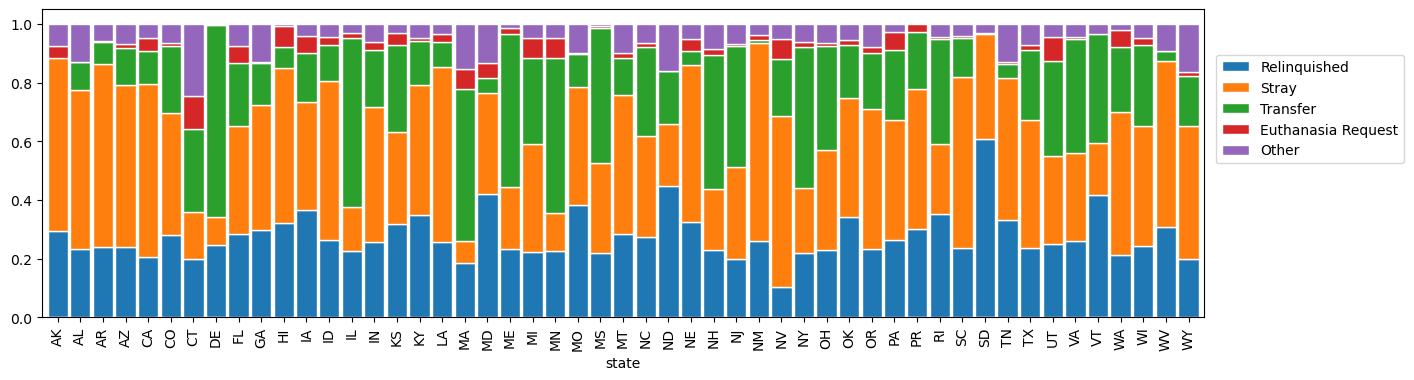

<Figure size 640x480 with 0 Axes>

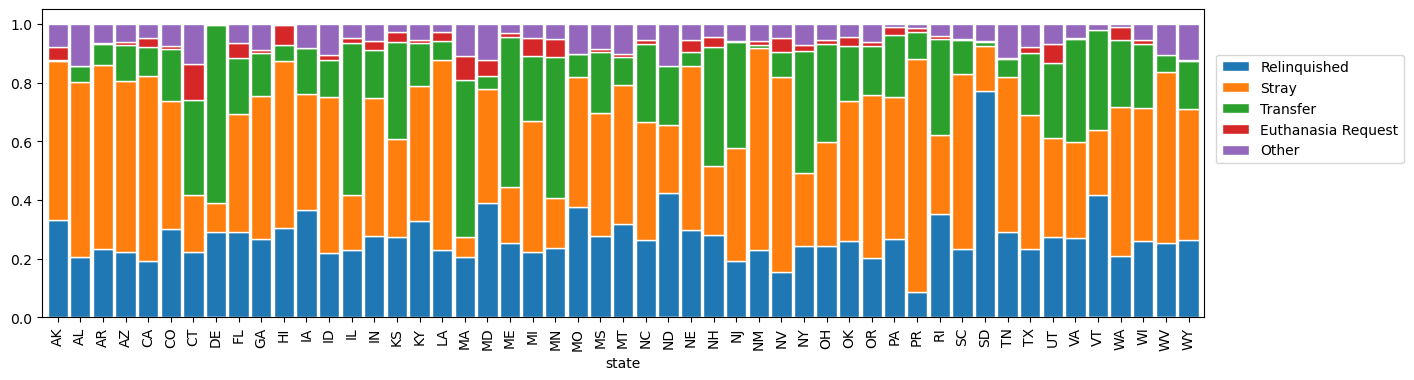

<Figure size 640x480 with 0 Axes>

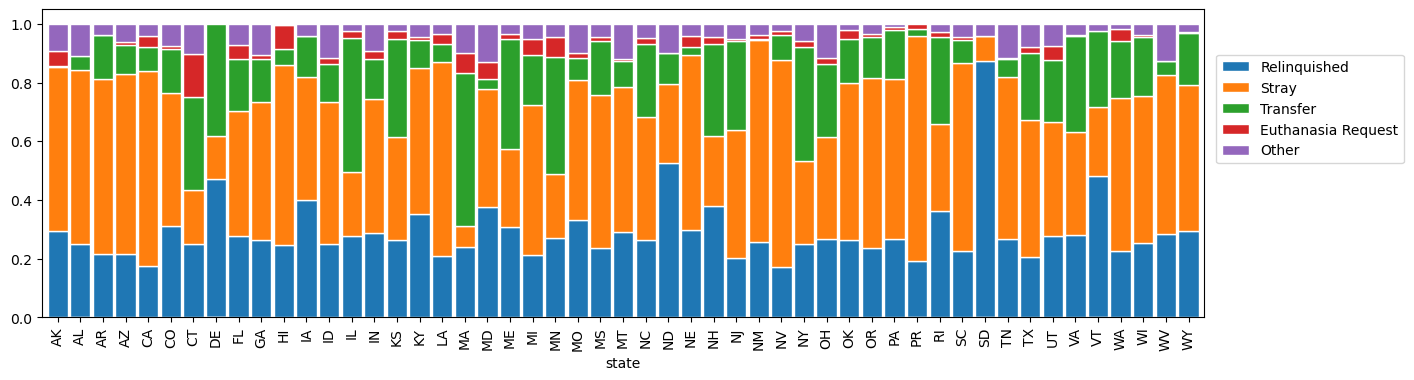

<Figure size 640x480 with 0 Axes>

In [51]:

for year in set(intake_df.year.unique()):

    plt_df = intake_df[intake_df.year==year].copy().reset_index(drop=True).set_index('state')

    plt_df[['relinquished_makeup','stray_makeup','transfer_makeup','intended_euthanasia_makeup','other_makeup']].plot(kind='bar',
                                                                                                                      stacked=True,
                                                                                                                      legend=True,
                                                                                                                      figsize=(15,4),
                                                                                                                      width=0.90, edgecolor='white')
    plt.legend(['Relinquished','Stray','Transfer','Euthanasia Request','Other'], loc=(1.01, 0.50))
    plt.savefig("intake_"+str(year)+".png", dpi=300)
    plt.show()
    plt.clf()
    del plt_df


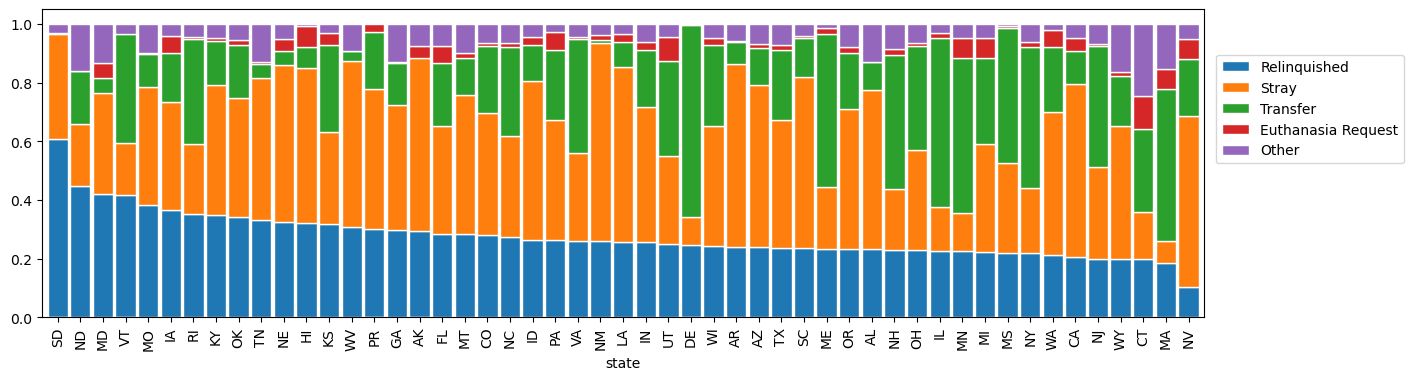

<Figure size 640x480 with 0 Axes>

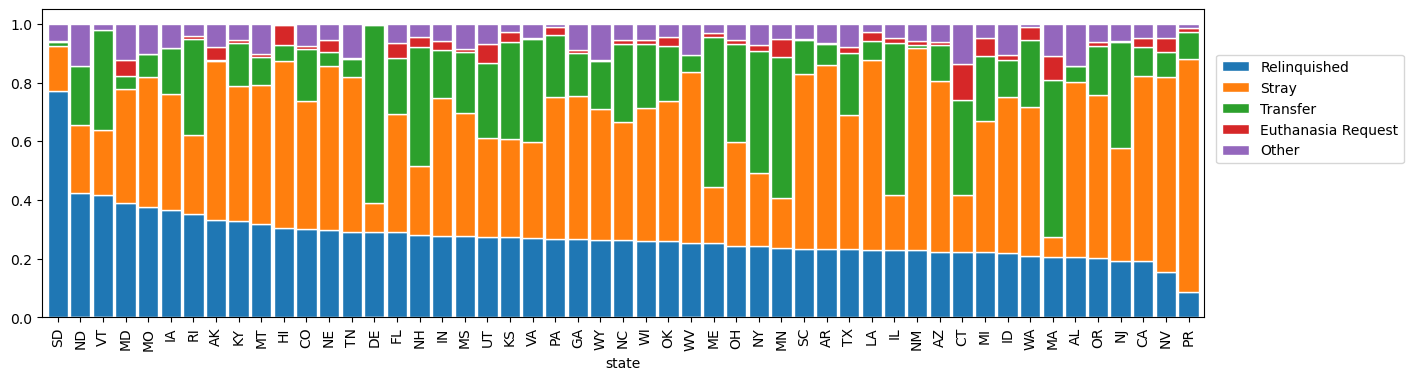

<Figure size 640x480 with 0 Axes>

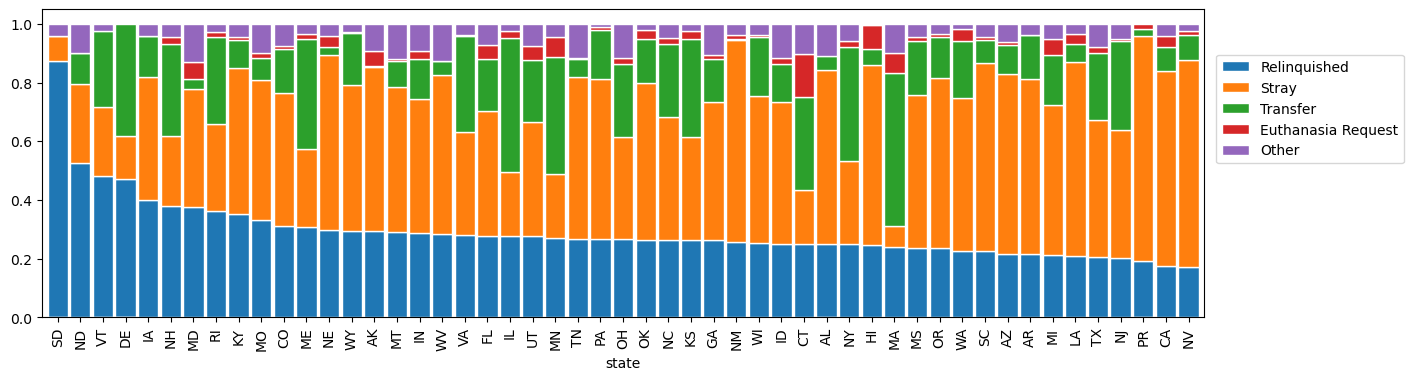

<Figure size 640x480 with 0 Axes>

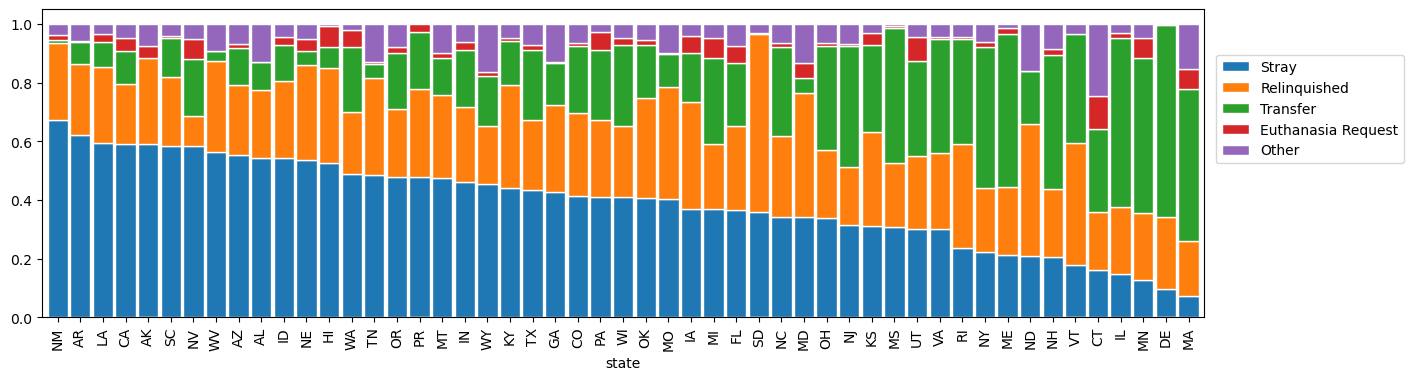

<Figure size 640x480 with 0 Axes>

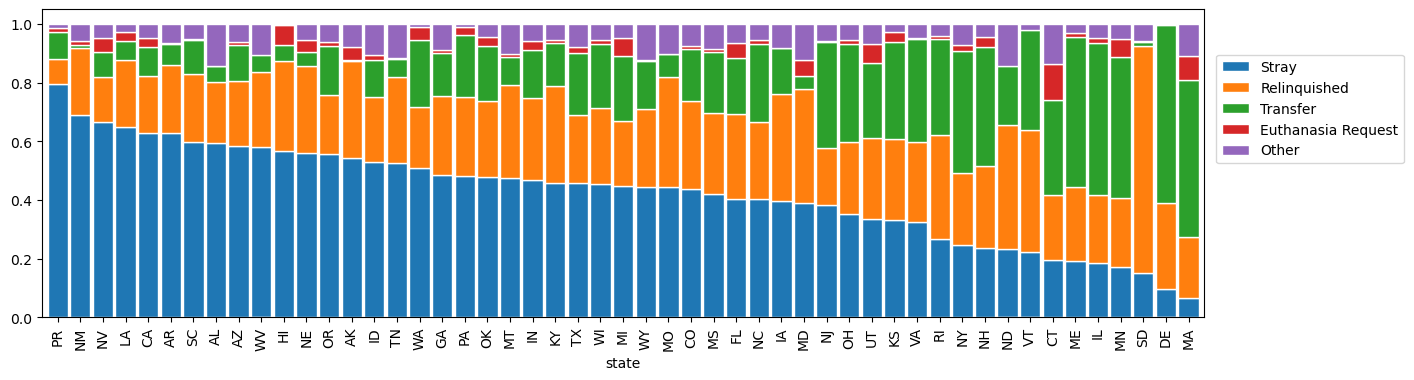

<Figure size 640x480 with 0 Axes>

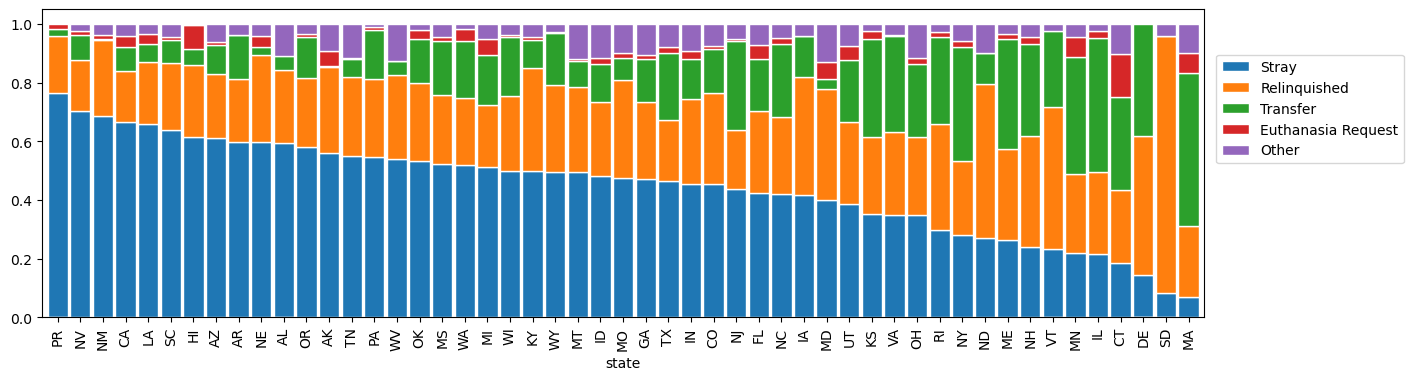

<Figure size 640x480 with 0 Axes>

In [52]:

for year in set(intake_df.year.unique()):

    plt_df = intake_df[intake_df.year==year].copy().reset_index(drop=True).set_index('state')

    plt_df[['relinquished_makeup','stray_makeup','transfer_makeup','intended_euthanasia_makeup','other_makeup']].sort_values(by=["relinquished_makeup",'stray_makeup'], ascending=False).plot(kind='bar',
                                                                                                                      stacked=True,
                                                                                                                      legend=True,
                                                                                                                      figsize=(15,4),
                                                                                                                      width=0.90, edgecolor='white')
    plt.legend(['Relinquished','Stray','Transfer','Euthanasia Request','Other'], loc=(1.01, 0.50))
    plt.savefig("sorted01_intake_"+str(year)+".png", dpi=300)
    plt.show()
    plt.clf()
    del plt_df


for year in set(intake_df.year.unique()):

    plt_df = intake_df[intake_df.year==year].copy().reset_index(drop=True).set_index('state')

    plt_df[['stray_makeup','relinquished_makeup','transfer_makeup','intended_euthanasia_makeup','other_makeup']].sort_values(by=["stray_makeup","relinquished_makeup"], ascending=False).plot(kind='bar',
                                                                                                                      stacked=True,
                                                                                                                      legend=True,
                                                                                                                      figsize=(15,4),
                                                                                                                      width=0.90, edgecolor='white')
    plt.legend(['Stray','Relinquished','Transfer','Euthanasia Request','Other'], loc=(1.01, 0.50))
    plt.savefig("sorted02_intake_"+str(year)+".png", dpi=300)
    plt.show()
    plt.clf()
    del plt_df


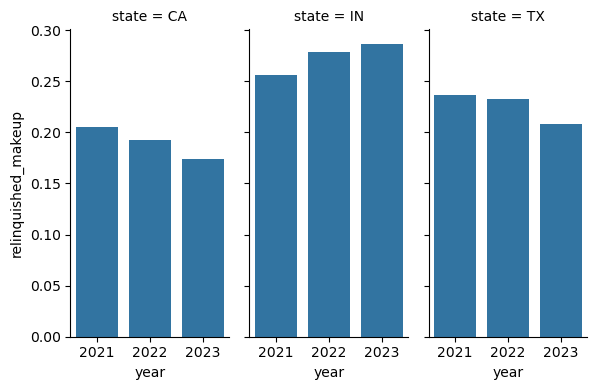

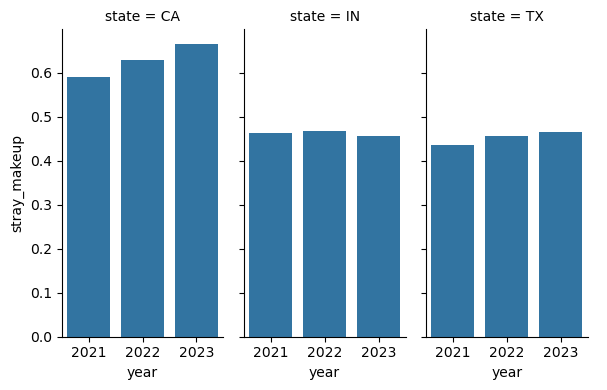

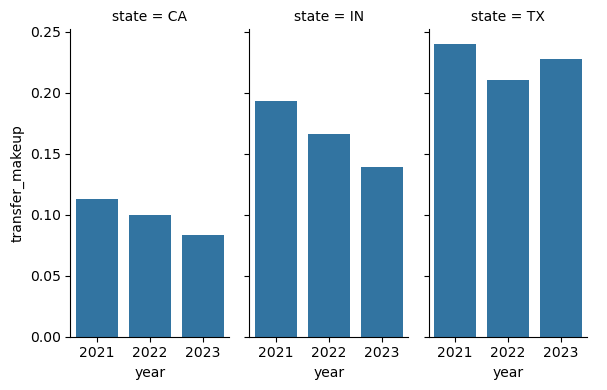

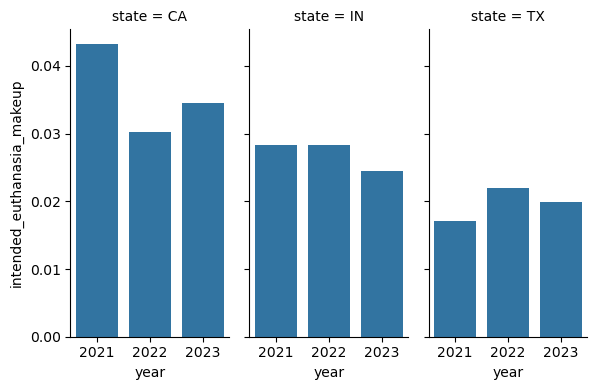

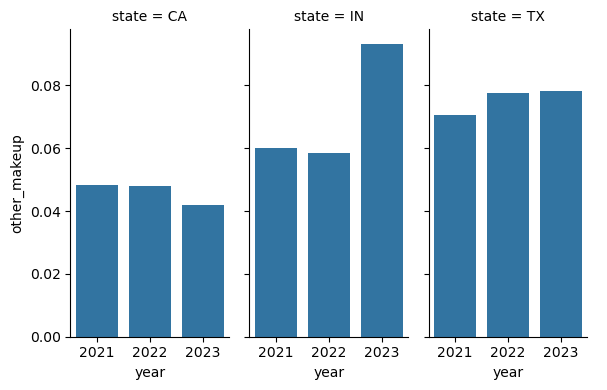

In [54]:
st_list = ['CA','IN','TX']
yr_list = set(dog_df.year.unique())

plt_df = intake_df[intake_df.state.isin(st_list)].copy().reset_index(drop=True)

for PAR in ['relinquished_makeup','stray_makeup','transfer_makeup','intended_euthanasia_makeup','other_makeup']:
    sns.catplot(data=plt_df, kind='bar', 
                x='year', y=PAR, 
                col="state",
                height=4, aspect=0.5).savefig("intake_split_"+PAR+"_year_state.png", dpi=300)

del st_list, yr_list, plt_df

### Focus: Outcome Categories

In [24]:
out_df = dog_df[['state','year']+outcome_cols].copy()
out_df.columns


Index(['state', 'year', 'live_outcome_adoption_total_canine',
       'live_outcome_returned_to_owner_total_canine',
       'live_outcome_returned_to_field_total_canine',
       'live_outcome_transferred_out_total_canine',
       'live_outcome_other_live_outcome_total_canine',
       'other_outcome_died_in_care_total_canine',
       'other_outcome_lost_in_care_total_canine',
       'other_outcome_owner_intended_euthanasia_total_canine',
       'other_outcome_shelter_euthanasia_total_canine'],
      dtype='object')

In [25]:
out_df.rename(columns={'live_outcome_adoption_total_canine':'adopted',
       'live_outcome_returned_to_owner_total_canine':'returned_owner',
       'live_outcome_returned_to_field_total_canine':'returned_field',
       'live_outcome_transferred_out_total_canine':'transfer',
       'live_outcome_other_live_outcome_total_canine':'other',
       'other_outcome_died_in_care_total_canine':'died_incare',
       'other_outcome_lost_in_care_total_canine':'lost_incare',
       'other_outcome_owner_intended_euthanasia_total_canine':'euthanized_intended',
       'other_outcome_shelter_euthanasia_total_canine':'euthanized_incare'}, inplace=True)

out_df.head()

,state,year,adopted,returned_owner,returned_field,transfer,other,died_incare,lost_incare,euthanized_intended,euthanized_incare
0,AK,2021,763,948,0,3,6,7,0,80,82
1,AK,2022,1106,1006,0,1,3,4,1,112,216
2,AK,2023,993,880,0,8,4,12,1,149,257
3,AL,2021,6577,2101,1,3592,90,180,7,7,2994
4,AL,2022,6681,2012,0,3190,808,193,14,0,3262


In [29]:
out_df['outcome_sum'] = out_df.drop(['state','year'], axis=1).sum(axis=1)

out_df.head()


,state,year,adopted,returned_owner,returned_field,transfer,other,died_incare,lost_incare,euthanized_intended,euthanized_incare,outcome_sum
0,AK,2021,763,948,0,3,6,7,0,80,82,1889.0
1,AK,2022,1106,1006,0,1,3,4,1,112,216,2449.0
2,AK,2023,993,880,0,8,4,12,1,149,257,2304.0
3,AL,2021,6577,2101,1,3592,90,180,7,7,2994,15549.0
4,AL,2022,6681,2012,0,3190,808,193,14,0,3262,16160.0


In [33]:
cols_list = out_df.drop(['state','year','outcome_sum'], axis=1).columns

for par in cols_list:
    out_df[par+"_makeup"] = out_df[par] / out_df.outcome_sum

del cols_list
out_df.head()


,state,year,adopted,returned_owner,returned_field,transfer,other,died_incare,lost_incare,euthanized_intended,...,outcome_sum,adopted_makeup,returned_owner_makeup,returned_field_makeup,transfer_makeup,other_makeup,died_incare_makeup,lost_incare_makeup,euthanized_intended_makeup,euthanized_incare_makeup
0,AK,2021,763,948,0,3,6,7,0,80,...,1889.0,0.403917,0.501853,0.000000,0.001588,0.003176,0.003706,0.000000,0.042350,0.043409
1,AK,2022,1106,1006,0,1,3,4,1,112,...,2449.0,0.451613,0.410780,0.000000,0.000408,0.001225,0.001633,0.000408,0.045733,0.088199
2,AK,2023,993,880,0,8,4,12,1,149,...,2304.0,0.430990,0.381944,0.000000,0.003472,0.001736,0.005208,0.000434,0.064670,0.111545
3,AL,2021,6577,2101,1,3592,90,180,7,7,...,15549.0,0.422985,0.135121,0.000064,0.231012,0.005788,0.011576,0.000450,0.000450,0.192553
4,AL,2022,6681,2012,0,3190,808,193,14,0,...,16160.0,0.413428,0.124505,0.000000,0.197401,0.050000,0.011943,0.000866,0.000000,0.201856


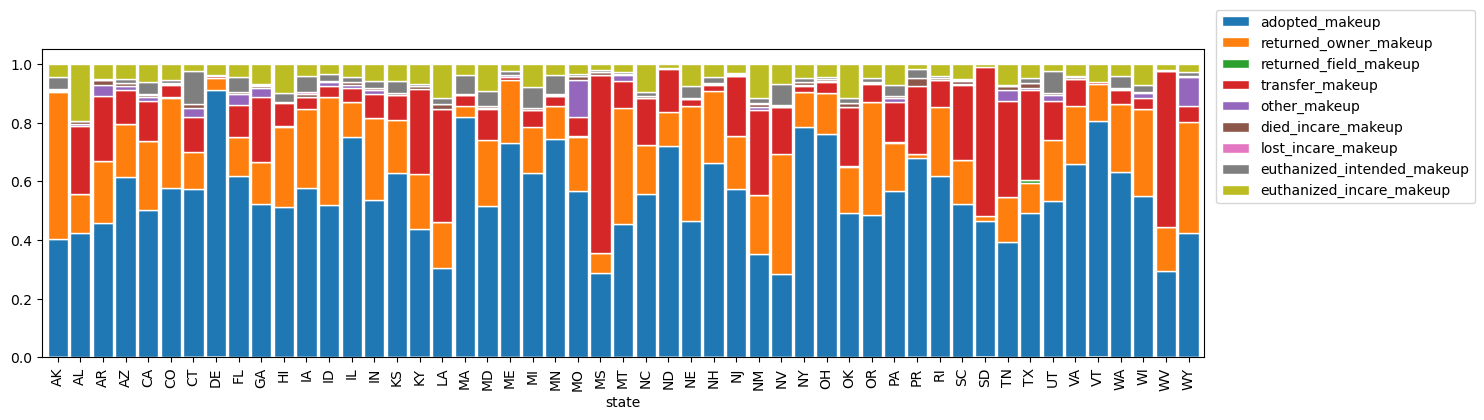

<Figure size 640x480 with 0 Axes>

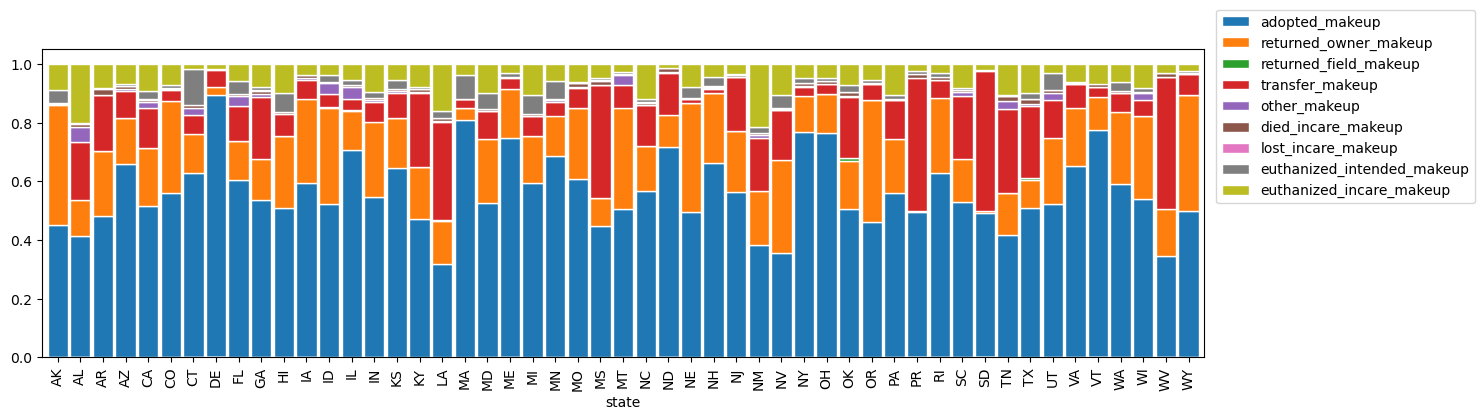

<Figure size 640x480 with 0 Axes>

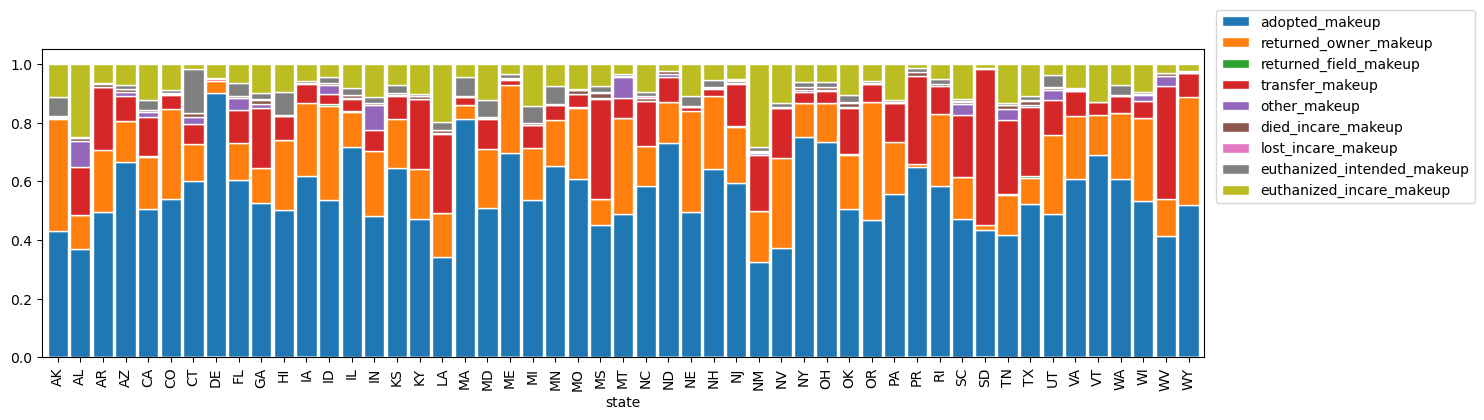

<Figure size 640x480 with 0 Axes>

In [49]:
for year in set(out_df.year.unique()):

    plt_df = out_df[out_df.year==year].copy().reset_index(drop=True).set_index('state')

    plt_df[[i for i in out_df.columns if "makeup" in i]].plot(kind='bar',
                stacked=True,
                legend=True,
                figsize=(15,4),
                width=0.90, edgecolor='white')
    plt.legend(loc=(1.01, 0.50))
    plt.savefig("outcome_"+str(year)+".png", dpi=300)
    plt.show()
    plt.clf()
    del plt_df


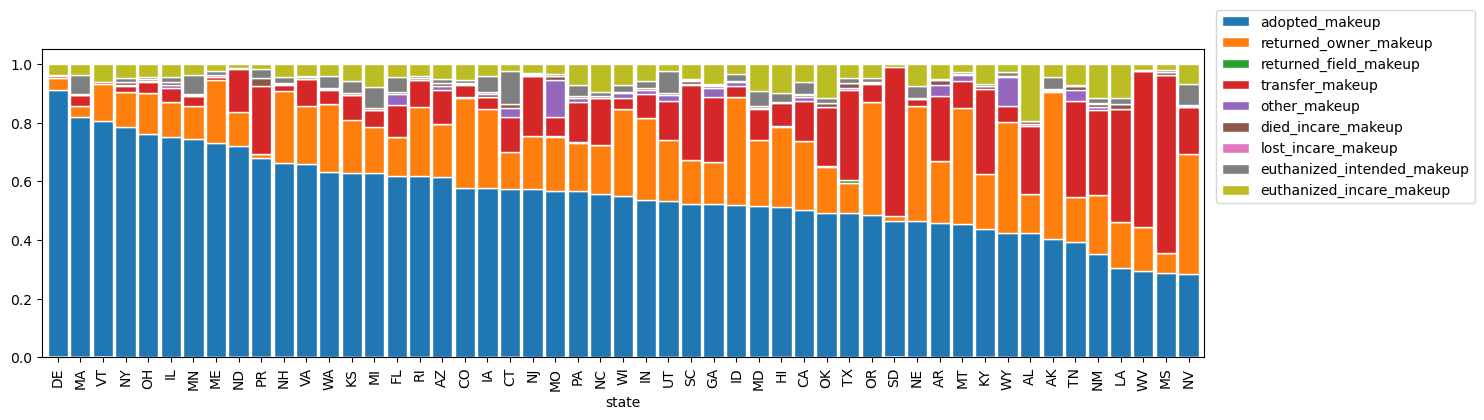

<Figure size 640x480 with 0 Axes>

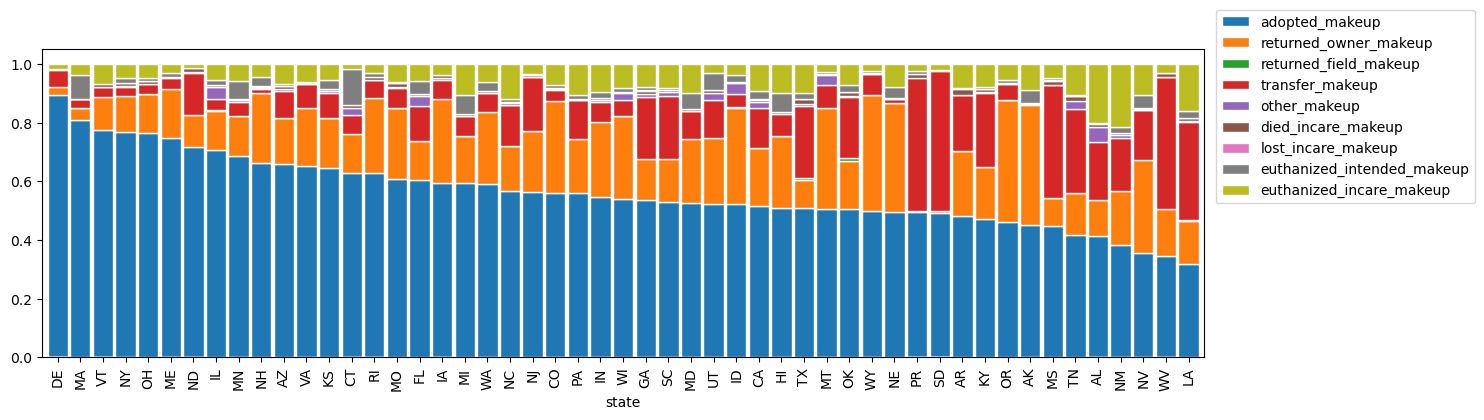

<Figure size 640x480 with 0 Axes>

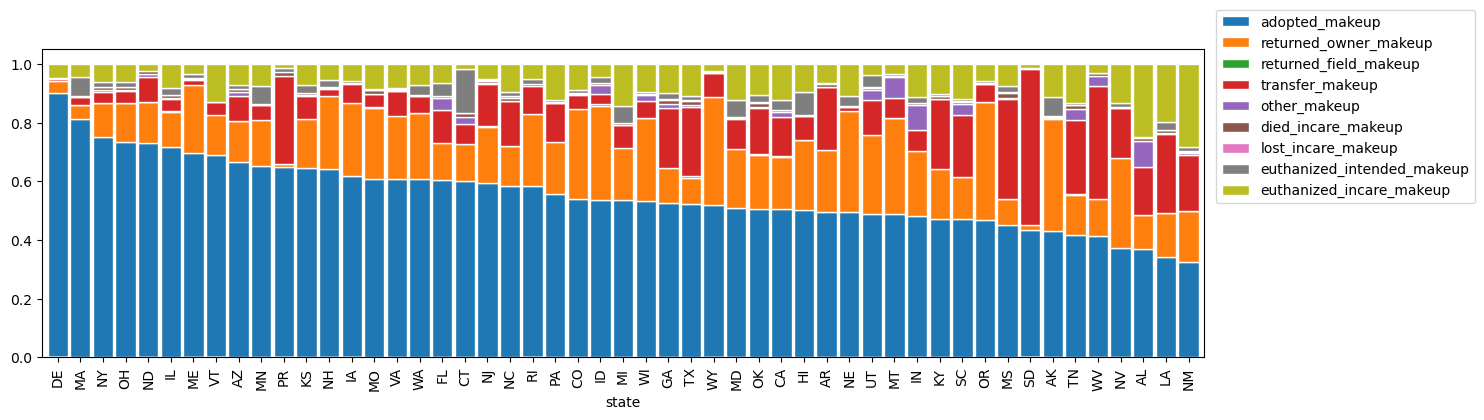

<Figure size 640x480 with 0 Axes>

In [50]:
for year in set(out_df.year.unique()):

    plt_df = out_df[out_df.year==year].copy().reset_index(drop=True).set_index('state').sort_values(by="adopted_makeup", ascending=False)

    plt_df[[i for i in out_df.columns if "makeup" in i]].plot(kind='bar',
                stacked=True,
                legend=True,
                figsize=(15,4),
                width=0.90, edgecolor='white')
    plt.legend(loc=(1.01, 0.50))
    plt.savefig("sorted_outcome_"+str(year)+".png", dpi=300)
    plt.show()
    plt.clf()
    del plt_df


----------------------

In [43]:
intake_df

,state,year,relinquished,stray,transfer,intended_euthanasia,other,intake_sum,relinquished_makeup,stray_makeup,transfer_makeup,intended_euthanasia_makeup,other_makeup
0,AK,2021,565,1130,0,75,144,1914,0.295193,0.590387,0.000000,0.039185,0.075235
1,AK,2022,808,1325,7,109,189,2438,0.331419,0.543478,0.002871,0.044709,0.077523
2,AK,2023,672,1276,3,117,210,2278,0.294996,0.560140,0.001317,0.051361,0.092186
3,AL,2021,3566,8323,1435,27,1953,15304,0.233011,0.543845,0.093766,0.001764,0.127614
4,AL,2022,3289,9517,872,4,2277,15959,0.206091,0.596341,0.054640,0.000251,0.142678
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,WV,2022,1298,2987,309,0,534,5128,0.253120,0.582488,0.060257,0.000000,0.104134
149,WV,2023,1396,2665,239,7,613,4920,0.283740,0.541667,0.048577,0.001423,0.124593
150,WY,2021,796,1832,675,58,656,4017,0.198158,0.456062,0.168036,0.014439,0.163306
151,WY,2022,1037,1737,638,18,474,3904,0.265625,0.444928,0.163422,0.004611,0.121414


In [46]:
dog_df.to_csv("../main_data/sac_3yr_aggregate/cleaned_3year_sac_agg.csv")